In [43]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [44]:
#Import CDO and make sure it works
from cdo import *

#--Initialize CDO
cdo=Cdo()

%matplotlib inline
import os
import matplotlib.pyplot as plt
from matplotlib import cm as pltcm
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib.colors as colors
from collections import defaultdict

os.chdir('/vftmp/Jane.Baldwin/STEP/ENS2_FIX/') #copy processed data files into here

In [45]:
#FLOR ENSEMBLE DATA

ensmax = 5 #highest number of ensemble member

num = np.arange(1,ensmax+1,1) #range of ensemble members

defs = ['3114','6217','3336']

files = defaultdict(dict)
ahwf = defaultdict(dict)
ahw2f = defaultdict(dict)
cp = defaultdict(dict)
ahwf_timmean = defaultdict(dict)
ahw2f_timmean = defaultdict(dict)
cp_timmean = defaultdict(dict)
ahwf_trend = defaultdict(dict)
ahw2f_trend = defaultdict(dict)
cp_trend = defaultdict(dict)
ens_ahwf = {}
ens_ahw2f = {}
ens_cp = {}
ens_ahwf_trend = {}
ens_ahw2f_trend = {}
ens_cp_trend = {}

for d in defs:
    for i in num:
        files[d][str(i)] = 'tn90pct_heatwaves_FLOR_r'+str(i)+'_'+d+'_yearly_summer.nc'
        cdo.selvar('AHWF_tn90pct',input='%s' %(files[d][str(i)]), options='-f nc', output='tn90pct_'+d+'_r'+str(i)+'_ahwf.nc')
        cdo.selvar('AHW2F_tn90pct',input='%s' %(files[d][str(i)]), options='-f nc', output='tn90pct_'+d+'_r'+str(i)+'_ahw2f.nc')
        cdo.mulc(100,input = '-div %s %s' %('tn90pct_'+d+'_r'+str(i)+'_ahw2f.nc','tn90pct_'+d+'_r'+str(i)+'_ahwf.nc'), options='-f nc', output='tn90pct_'+d+'_r'+str(i)+'_cp.nc')
        cdo.timmean(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_r'+str(i)+'_ahwf.nc'), options='-f nc', output='tn90pct_'+d+'_r'+str(i)+'_ahwf_timmean.nc')
        cdo.timmean(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_r'+str(i)+'_ahw2f.nc'), options='-f nc', output='tn90pct_'+d+'_r'+str(i)+'_ahw2f_timmean.nc')
        cdo.timmean(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_r'+str(i)+'_cp.nc'), output = 'tn90pct_'+d+'_r'+str(i)+'_cp_timmean.nc',options='-f nc', returnCdf=True)
        cdo.trend(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_r'+str(i)+'_ahwf.nc'), options='-f nc', output='%s %s' 
                                              %('tn90pct_'+d+'_r'+str(i)+'_ahwf_trenda.nc','tn90pct_'+d+'_r'+str(i)+'_ahwf_trendb.nc'))
        cdo.trend(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_r'+str(i)+'_ahw2f.nc'), options='-f nc', output='%s %s'
                                              %('tn90pct_'+d+'_r'+str(i)+'_ahw2f_trenda.nc','tn90pct_'+d+'_r'+str(i)+'_ahw2f_trendb.nc'))
        cdo.trend(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_r'+str(i)+'_cp.nc'), output = '%s %s'
                                            %('tn90pct_'+d+'_r'+str(i)+'_cp_trenda.nc','tn90pct_'+d+'_r'+str(i)+'_cp_trendb.nc'))
        ahwf_timmean[d][str(i)] = np.squeeze(Dataset('tn90pct_'+d+'_r'+str(i)+'_ahwf_timmean.nc','r').variables['AHWF_tn90pct'][:])
        ahw2f_timmean[d][str(i)] = np.squeeze(Dataset('tn90pct_'+d+'_r'+str(i)+'_ahw2f_timmean.nc','r').variables['AHW2F_tn90pct'][:])
        cp_timmean[d][str(i)] = np.squeeze(Dataset('tn90pct_'+d+'_r'+str(i)+'_cp_timmean.nc','r').variables['AHW2F_tn90pct'][:])
        ahwf_trend[d][str(i)] = np.squeeze(Dataset('tn90pct_'+d+'_r'+str(i)+'_ahwf_trendb.nc','r').variables['AHWF_tn90pct'][:])
        ahw2f_trend[d][str(i)] = np.squeeze(Dataset('tn90pct_'+d+'_r'+str(i)+'_ahw2f_trendb.nc','r').variables['AHW2F_tn90pct'][:])
        cp_trend[d][str(i)] = np.squeeze(Dataset('tn90pct_'+d+'_r'+str(i)+'_cp_trendb.nc','r').variables['AHW2F_tn90pct'][:])
        if i == 1:
            ens_ahwf[d] = np.expand_dims(ahwf_timmean[d][str(i)],2)
            ens_ahw2f[d] = np.expand_dims(ahw2f_timmean[d][str(i)],2)
            ens_cp[d] = np.expand_dims(cp_timmean[d][str(i)],2)
            ens_ahwf_trend[d] = np.expand_dims(ahwf_trend[d][str(i)],2)
            ens_ahw2f_trend[d] = np.expand_dims(ahw2f_trend[d][str(i)],2)
            ens_cp_trend[d] = np.expand_dims(cp_trend[d][str(i)],2)
        else:
            ens_ahwf[d] = np.append(ens_ahwf[d],np.expand_dims(ahwf_timmean[d][str(i)],2),axis=2)
            ens_ahw2f[d] = np.append(ens_ahw2f[d],np.expand_dims(ahw2f_timmean[d][str(i)],2),axis=2)
            ens_cp[d] = np.append(ens_cp[d],np.expand_dims(cp_timmean[d][str(i)],2),axis=2)
            ens_ahwf_trend[d] = np.append(ens_ahwf_trend[d],np.expand_dims(ahwf_trend[d][str(i)],2),axis=2)
            ens_ahw2f_trend[d] = np.append(ens_ahw2f_trend[d],np.expand_dims(ahw2f_trend[d][str(i)],2),axis=2)
            ens_cp_trend[d] = np.append(ens_cp_trend[d],np.expand_dims(cp_trend[d][str(i)],2),axis=2)

In [53]:
#REGIONAL AVERAGE TIME SERIES
reg = {}
ahwf_reg_dat = defaultdict(dict)
ahwf_reg = defaultdict(dict)
ahw2f_reg_dat = defaultdict(dict)
ahw2f_reg = defaultdict(dict)
cp_reg_dat = defaultdict(dict)
cp_reg = defaultdict(dict)
sum_reg = defaultdict(dict)
mean_reg = defaultdict(dict)
sum2_reg = defaultdict(dict)
mean2_reg = defaultdict(dict)
sumcp_reg = defaultdict(dict)
meancp_reg = defaultdict(dict)

reg['europe'] = '-10,40,40,60'
reg['usa'] = '-125,-65,20,50'
reg['asia'] = '70,140,0,60'

for d in defs:
    for key,value in reg.iteritems():
        ahwf_reg_dat[d][key] = {}
        ahw2f_reg_dat[d][key] = {}
        cp_reg_dat[d][key] = {}
        ahwf_reg[d][key] = {}
        ahw2f_reg[d][key] = {}
        cp_reg[d][key] = {}
        for i in num:
            ahwf_reg_dat[d][key][str(i)] = cdo.fldmean(input = '-selyear,1941/2050 -sellonlatbox,%s %s' %(value,'tn90pct_'+d+'_r'+str(i)+'_ahwf.nc'), options='-f nc', returnCdf=True, output='tn90pct_'+d+'_r'+str(i)+'_ahwf_'+key+'.nc')
            ahw2f_reg_dat[d][key][str(i)] = cdo.fldmean(input = '-selyear,1941/2050 -sellonlatbox,%s %s' %(value,'tn90pct_'+d+'_r'+str(i)+'_ahw2f.nc'), options='-f nc', returnCdf=True, output='tn90pct_'+d+'_r'+str(i)+'_ahw2f_'+key+'.nc')
            cp_reg_dat[d][key][str(i)] = cdo.fldmean(input = '-selyear,1941/2050 -sellonlatbox,%s %s' %(value,'tn90pct_'+d+'_r'+str(i)+'_cp.nc'), options='-f nc', returnCdf=True, output='tn90pct_'+d+'_r'+str(i)+'_cp_'+key+'.nc')
            ahwf_reg[d][key][str(i)] = np.squeeze(ahwf_reg_dat[d][key][str(i)]['AHWF_tn90pct'][:])
            ahw2f_reg[d][key][str(i)] = np.squeeze(ahw2f_reg_dat[d][key][str(i)]['AHW2F_tn90pct'][:])
            cp_reg[d][key][str(i)] = np.squeeze(cp_reg_dat[d][key][str(i)]['AHW2F_tn90pct'][:])
            if i == 1:
                sum_reg[d][key] = ahwf_reg[d][key][str(i)]
                sum2_reg[d][key] = ahw2f_reg[d][key][str(i)]
                sumcp_reg[d][key] = cp_reg[d][key][str(i)]
            else:
                sum_reg[d][key] = sum_reg[d][key] + ahwf_reg[d][key][str(i)]
                sum2_reg[d][key] = sum2_reg[d][key] + ahw2f_reg[d][key][str(i)]
                sumcp_reg[d][key] = sumcp_reg[d][key] + cp_reg[d][key][str(i)]
        mean_reg[d][key] = sum_reg[d][key]/ensmax
        mean2_reg[d][key] = sum2_reg[d][key]/ensmax
        meancp_reg[d][key] = sumcp_reg[d][key]/ensmax

time = np.squeeze(ahw2f_reg_dat['3114']['europe']['1']['time'][:])

In [48]:
#MERRA DATA
files_m = {}
ahw2f_m = {}
ahwf_m = {}
cp_m = {}
ahwf_timmean_m = {}
ahw2f_timmean_m = {}
cp_timmean_m = {}
ahwf_trend_m = {}
ahw2f_trend_m = {}
cp_trend_m = {}

for d in defs:
    files_m[d] = 'tn90pct_heatwaves_MERRA_r0_'+d+'_yearly_summer_florgrid.nc' #regridded to FLOR's grid using FERRET @AVE transformation
    cdo.selvar('AHWF_tn90pct',input='%s' %(files_m[d]), options='-f nc', output='tn90pct_'+d+'_ahwf_merra.nc')
    cdo.selvar('AHW2F_tn90pct',input='%s' %(files_m[d]), options='-f nc', output='tn90pct_'+d+'_ahw2f_merra.nc')
    cdo.mulc(100,input = '-div %s %s' %('tn90pct_'+d+'_ahw2f.nc','tn90pct_'+d+'_ahwf_merra.nc'), output = 'tn90pct_'+d+'_cp_merra.nc',options='-f nc')
    cdo.timmean(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_ahwf_merra.nc'), options='-f nc', output='tn90pct_'+d+'_ahwf_timmean_merra.nc')
    cdo.timmean(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_ahw2f_merra.nc'), options='-f nc', output='tn90pct_'+d+'_ahw2f_timmean_merra.nc')
    cdo.timmean(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_cp_merra.nc'), output = 'tn90pct_'+d+'_cp_timmean_merra.nc',options='-f nc', returnCdf=True)
    cdo.trend(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_ahwf_merra.nc'), options='-f nc', output='%s %s' %('tn90pct_'+d+'_ahwf_trenda_merra.nc','tn90pct_'+d+'_ahwf_trendb_merra.nc'))
    cdo.trend(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_ahw2f_merra.nc'), options='-f nc', output='%s %s' %('tn90pct_'+d+'_ahw2f_trenda_merra.nc','tn90pct_'+d+'_ahw2f_trendb_merra.nc'))
    cdo.trend(input = '-selyear,1980/2015 %s' %('tn90pct_'+d+'_cp_merra.nc'), output = '%s %s' %('tn90pct_'+d+'_cp_trenda_merra.nc','tn90pct_'+d+'_cp_trendb_merra.nc'))
    ahwf_timmean_m[d] = np.squeeze(Dataset('tn90pct_'+d+'_ahwf_timmean_merra.nc','r').variables['AHWF_tn90pct'][:])
    ahw2f_timmean_m[d] = np.squeeze(Dataset('tn90pct_'+d+'_ahw2f_timmean_merra.nc','r').variables['AHW2F_tn90pct'][:])
    cp_timmean_m[d] = np.squeeze(Dataset('tn90pct_'+d+'_cp_timmean_merra.nc','r').variables['AHW2F_tn90pct'][:])
    ahwf_trend_m[d] = np.squeeze(Dataset('tn90pct_'+d+'_ahwf_trendb_merra.nc','r').variables['AHWF_tn90pct'][:])
    ahw2f_trend_m[d] = np.squeeze(Dataset('tn90pct_'+d+'_ahw2f_trendb_merra.nc','r').variables['AHW2F_tn90pct'][:])
    cp_trend_m[d] = np.squeeze(Dataset('tn90pct_'+d+'_cp_trendb_merra.nc','r').variables['AHW2F_tn90pct'][:])

lons0 = np.squeeze(Dataset('tn90pct_3114_ahwf_timmean_merra.nc','r').variables['LON'][:])
lats0 = np.squeeze(Dataset('tn90pct_3114_ahwf_timmean_merra.nc','r').variables['LAT'][:])

In [49]:
#MERRA REGIONAL AVERAGES
ahwf_reg_dat_m = defaultdict(dict)
ahwf_reg_m = defaultdict(dict)
ahw2f_reg_dat_m = defaultdict(dict)
ahw2f_reg_m = defaultdict(dict)
cp_reg_dat_m = defaultdict(dict)
cp_reg_m = defaultdict(dict)

for d in defs:
    for key,value in reg.iteritems():
        ahwf_reg_dat_m[d][key] = cdo.fldmean(input = '-selyear,1941/2050 -sellonlatbox,%s %s' %(value,'tn90pct_'+d+'_ahwf_merra.nc'), options='-f nc', returnCdf=True, output='tn90pct_'+d+'_ahwf_'+key+'.nc')
        ahw2f_reg_dat_m[d][key] = cdo.fldmean(input = '-selyear,1941/2050 -sellonlatbox,%s %s' %(value,'tn90pct_'+d+'_ahw2f_merra.nc'), options='-f nc', returnCdf=True, output='tn90pct_'+d+'_ahw2f_'+key+'.nc')
        cp_reg_dat_m[d][key] = cdo.fldmean(input = '-selyear,1941/2050 -sellonlatbox,%s %s' %(value,'tn90pct_'+d+'_cp_merra.nc'), options='-f nc', returnCdf=True, output='tn90pct_'+d+'_cp_'+key+'.nc')
        ahwf_reg_m[d][key] = np.squeeze(ahwf_reg_dat_m[d][key]['AHWF_tn90pct'][:])
        ahw2f_reg_m[d][key] = np.squeeze(ahw2f_reg_dat_m[d][key]['AHW2F_tn90pct'][:])
        cp_reg_m[d][key] = np.squeeze(cp_reg_dat_m[d][key]['AHW2F_tn90pct'][:])
     
time_m = np.squeeze(ahw2f_reg_dat_m['3114']['europe']['TIME1'][:])

In [50]:
#Define places where MERRA is in the range of the ensemble
landmask = np.ma.getmask(ahwf_timmean[d]['1'])

def mask(ens,merra,d):
    max = np.max(ens[d],axis=2)
    min = np.min(ens[d],axis=2)
    mean = np.mean(ens[d],axis=2)
    range = np.ma.masked_where(landmask,max-min)
    greater = np.greater(merra[d],max)
    greaterdiff = (merra[d]-max)
    less = np.less(merra[d],min)
    lessdiff = (merra[d]-min)
    maskrange = (greater*greaterdiff+less*lessdiff)/range*100
    maskmean = (greater*greaterdiff+less*lessdiff)/mean*100
    maskrange = np.ma.masked_where(maskrange==0,maskrange)
    maskmean = np.ma.masked_where(maskmean==0,maskmean)
    return maskrange, maskmean, mean, range

d = '6217'
maskrange_ahwfmean, maskmean_ahwfmean, ahwfmeanmean, ahwfmeanrange = mask(ens_ahwf,ahwf_timmean_m,d)  
maskrange_ahw2fmean, maskmean_ahw2fmean, ahw2fmeanmean, ahw2fmeanrange = mask(ens_ahw2f,ahw2f_timmean_m,d)
maskrange_cpmean, maskmean_cpmean, cpmeanmean, cpmeanrange = mask(ens_cp,cp_timmean_m,d)
maskrange_ahwftrend, maskmean_ahwftrend, ahwftrendmean, ahwftrendrange = mask(ens_ahwf_trend,ahwf_trend_m,d)  
maskrange_ahw2ftrend, maskmean_ahw2ftrend, ahw2ftrendmean, ahw2ftrendrange = mask(ens_ahw2f_trend,ahw2f_trend_m,d)
maskrange_cptrend, maskmean_cptrend, cptrendmean, cptrendrange = mask(ens_cp_trend,cp_trend_m,d)

In [ ]:
#Difference Maps

fig = plt.figure(figsize=(12,12))

fs = 12

start = lons0[0]
y1 = -90
y2 = 90
sf = 180
x1 = start+sf
lon0 = start+180+sf

bounds = np.arange(-200,210,10)

cmap = cm.GMT_no_green

ax1 = plt.subplot(3,2,1)
var = maskrange_ahwfmean*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax2 = plt.subplot(3,2,2)
var = maskrange_ahwftrend*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax3 = plt.subplot(3,2,3)
var = maskrange_ahw2fmean*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax4 = plt.subplot(3,2,4)
var = maskrange_ahw2ftrend*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax5 = plt.subplot(3,2,5)
var = maskrange_cpmean*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax6 = plt.subplot(3,2,6)
var = maskrange_cptrend*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')


ax1.text(0.5,1.1, "Mean", transform=ax1.transAxes, fontsize=24, rotation='horizontal',ha='center',va='center')
ax2.text(0.5,1.1, "Trend", transform=ax2.transAxes, fontsize=24, rotation='horizontal',ha='center',va='center')
ax1.text(-0.1,0.5, "AHWF", transform=ax1.transAxes, fontsize=24, rotation='vertical',ha='center',va='center')
ax3.text(-0.1,0.5, "AHW2F", transform=ax3.transAxes, fontsize=24, rotation='vertical',ha='center',va='center')
ax5.text(-0.1,0.5, "CP", transform=ax5.transAxes, fontsize=24, rotation='vertical',ha='center',va='center')

fs = 30
ax1.text(0.919,0.919, "a", transform=ax1.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax2.text(0.919,0.919, "b", transform=ax2.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.919,0.919, "c", transform=ax3.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax1.text(0.919,0.919, "d", transform=ax4.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax2.text(0.919,0.919, "e", transform=ax5.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.919,0.919, "f", transform=ax6.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)

cax = fig.add_axes([1.05, 0.3, 0.03, 0.4])
art = plt.colorbar(cs, cax, orientation='vertical')
art.set_label('[Deviation from MERRA2]/[Ensemble Range] [%]', fontsize=24)
art.ax.tick_params(labelsize=20)

plt.tight_layout(pad=0.2, w_pad=4, h_pad=2)

fig.savefig('modelvmerrabias_'+d+'_option1.pdf', bbox_inches='tight')

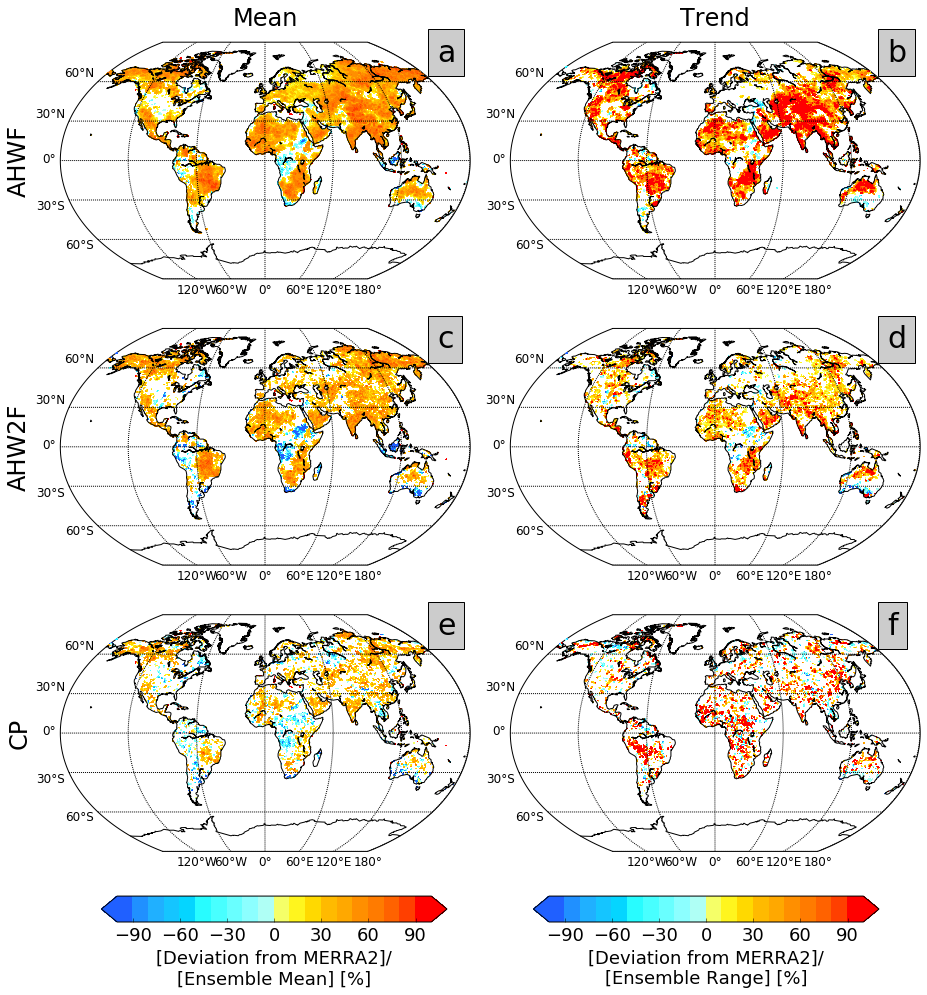

In [74]:
#Difference Maps Mean Deviation divided by Ensemble Mean and Trend Deviation Divided by Ensemble Range

fig = plt.figure(figsize=(12,12))

fs = 12

start = lons0[0]
y1 = -90
y2 = 90
sf = 180
x1 = start+sf
lon0 = start+180+sf

bounds = np.arange(-100,110,10)

cmap = cm.GMT_no_green

ax1 = plt.subplot(3,2,1)
var = maskmean_ahwfmean*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax2 = plt.subplot(3,2,2)
var = maskrange_ahwftrend*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax3 = plt.subplot(3,2,3)
var = maskmean_ahw2fmean*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax4 = plt.subplot(3,2,4)
var = maskrange_ahw2ftrend*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
xi, yi = m(lon, lat)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax5 = plt.subplot(3,2,5)
var = maskmean_cpmean*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')

ax6 = plt.subplot(3,2,6)
var = maskrange_cptrend*(-1)
shift, lons = shiftgrid(x1,var,lons0,start=True,cyclic=360.0)
lon, lat = np.meshgrid(lons, lats0)
m = Basemap(projection='kav7',lon_0=lon0,resolution='c') #lon_0=180
m.drawmapboundary(fill_color='white')
m.drawcoastlines() # draw coast line
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=fs)
# draw meridians
meridians = np.arange(0.,360.,60.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=fs)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
cs2 = m.contourf(xi,yi,shift,bounds,norm=norm,cmap=cmap,extend='both')


ax1.text(0.5,1.1, "Mean", transform=ax1.transAxes, fontsize=24, rotation='horizontal',ha='center',va='center')
ax2.text(0.5,1.1, "Trend", transform=ax2.transAxes, fontsize=24, rotation='horizontal',ha='center',va='center')
ax1.text(-0.1,0.5, "AHWF", transform=ax1.transAxes, fontsize=24, rotation='vertical',ha='center',va='center')
ax3.text(-0.1,0.5, "AHW2F", transform=ax3.transAxes, fontsize=24, rotation='vertical',ha='center',va='center')
ax5.text(-0.1,0.5, "CP", transform=ax5.transAxes, fontsize=24, rotation='vertical',ha='center',va='center')

fs = 30
ax1.text(0.919,0.919, "a", transform=ax1.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax2.text(0.919,0.919, "b", transform=ax2.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.919,0.919, "c", transform=ax3.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax1.text(0.919,0.919, "d", transform=ax4.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax2.text(0.919,0.919, "e", transform=ax5.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)
ax3.text(0.919,0.919, "f", transform=ax6.transAxes, fontsize=fs, bbox=dict(boxstyle='square',
            fc='0.8', alpha=1.0), zorder=100)

cax = fig.add_axes([0.05, -0.05, 0.4, 0.03])
art = plt.colorbar(cs, cax, orientation='horizontal')
art.set_label('[Deviation from MERRA2]/\n[Ensemble Mean] [%]', fontsize=18)
art.ax.tick_params(labelsize=18)

cax = fig.add_axes([0.55, -0.05, 0.4, 0.03])
art = plt.colorbar(cs2, cax, orientation='horizontal')
art.set_label('[Deviation from MERRA2]/\n[Ensemble Range] [%]', fontsize=18)
art.ax.tick_params(labelsize=18)

plt.tight_layout(pad=0.2, w_pad=4, h_pad=2)

fig.savefig('modelvmerrabias_'+d+'_option2.pdf', bbox_inches='tight')

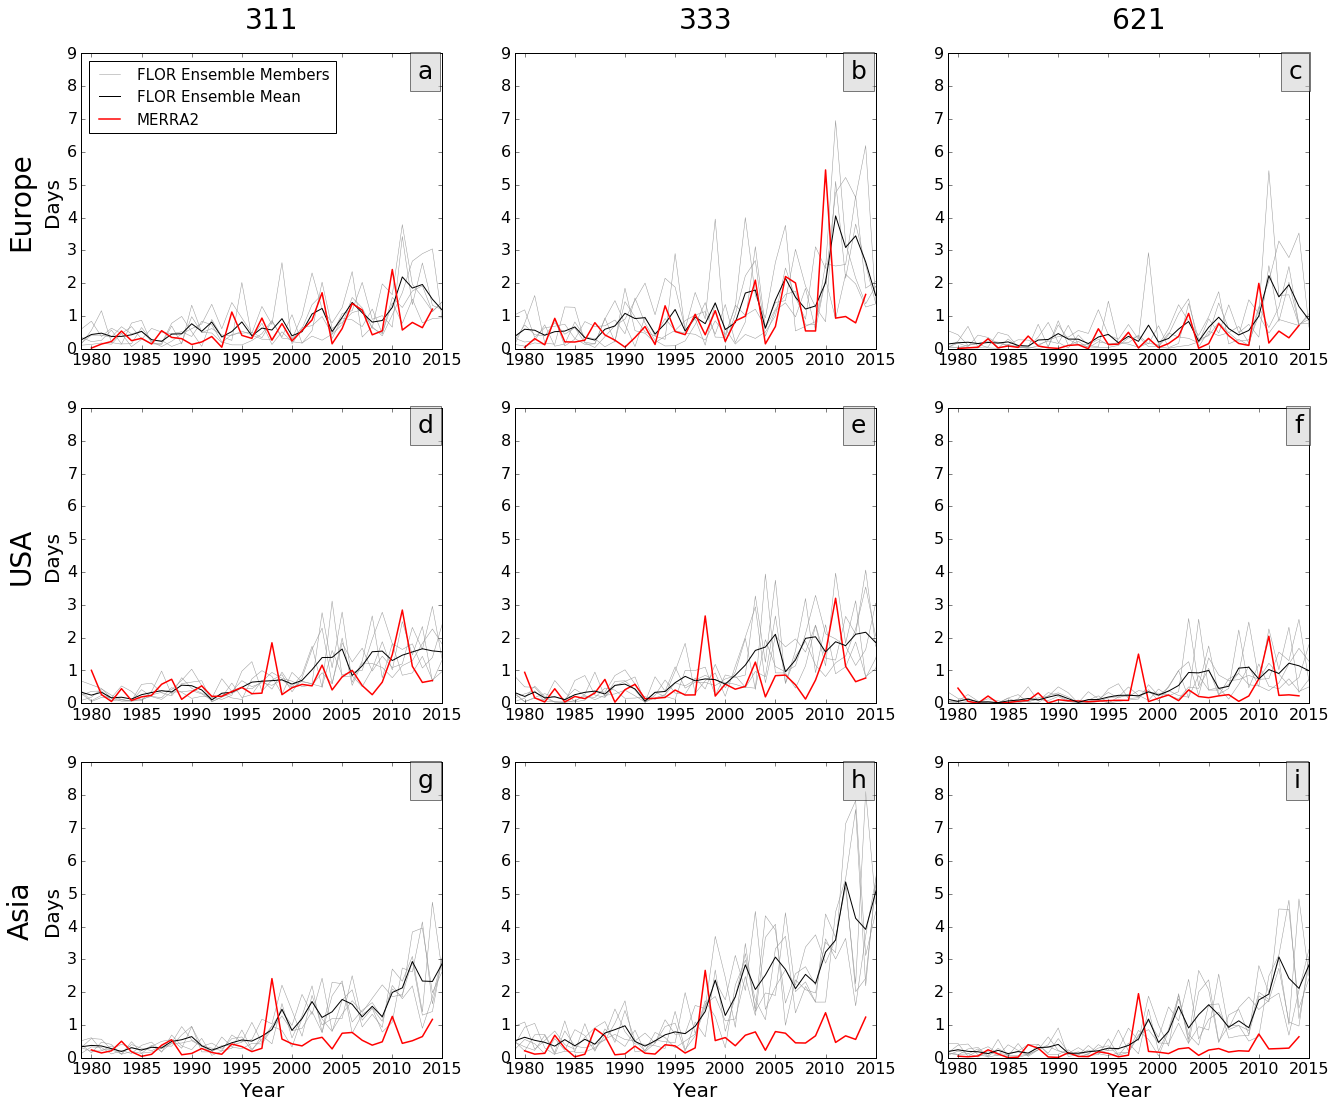

In [51]:
#ENSEMBLE FOR US AND EUROPE AND 3 DEFS FIGURE AHW2F

plt.figure(figsize=(22,18))
plt.rcParams.update({'font.size': 16})
ymax = 9
tmin = 1979
tmax = 2015
lbox = 8.25
nbox = 10
rbox = 4.5

plt.subplot(3,3,1)
plt.plot(time,ahw2f_reg['3114']['europe']['1'],color='0.6',linewidth='0.5',label='FLOR Ensemble Members')
for i in np.arange(2,ensmax+1,1):
    plt.plot(time,ahw2f_reg['3114']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean2_reg['3114']['europe'],color='k',linewidth='1',label='FLOR Ensemble Mean')
plt.plot(time_m,ahw2f_reg_m['3114']['europe'],color='r',linewidth='1.5',label='MERRA2')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year')
plt.ylabel('Days',fontsize='20')
plt.text(1998,nbox, "311", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(1973,rbox, "Europe", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2013-0.5,lbox, "a", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)
plt.legend(loc='upper left',bbox_to_anchor=(0, 1),fontsize=15)

plt.subplot(3,3,3)
for i in num:
    plt.plot(time,ahw2f_reg['6217']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean2_reg['6217']['europe'],color='k',linewidth='1')
plt.plot(time_m,ahw2f_reg_m['6217']['europe'],color='r',linewidth='1.5')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year')
#plt.ylabel('Days')
plt.text(1998,nbox, "621", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(2013,lbox, "c", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,2)
for i in num:
    plt.plot(time,ahw2f_reg['3336']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean2_reg['3336']['europe'],color='k',linewidth='1')
plt.plot(time_m,ahw2f_reg_m['3336']['europe'],color='r',linewidth='1.5')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year')
#plt.ylabel('Days')
plt.text(1998,nbox, "333", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(2013-0.5,lbox, "b", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,4)
for i in num:
    plt.plot(time,ahw2f_reg['3114']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean2_reg['3114']['usa'],color='k',linewidth='1')
plt.plot(time_m,ahw2f_reg_m['3114']['usa'],color='r',linewidth='1.5')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year',fontsize='20')
plt.ylabel('Days',fontsize='20')
plt.text(1973,rbox, "USA", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2013-0.5,lbox, "d", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,6)
for i in num:
    plt.plot(time,ahw2f_reg['6217']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,ahw2f_reg_m['6217']['usa'],color='r',linewidth='1.5')
plt.plot(time,mean2_reg['6217']['usa'],color='k',linewidth='1')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2013+0.5,lbox, "f", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,5)
for i in num:
    plt.plot(time,ahw2f_reg['3336']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,ahw2f_reg_m['3336']['usa'],color='r',linewidth='1.5')
plt.plot(time,mean2_reg['3336']['usa'],color='k',linewidth='1')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2013-0.5,lbox, "e", fontsize=25,bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,7)
for i in num:
    plt.plot(time,ahw2f_reg['3114']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean2_reg['3114']['asia'],color='k',linewidth='1')
plt.plot(time_m,ahw2f_reg_m['3114']['asia'],color='r',linewidth='1.5')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
plt.ylabel('Days',fontsize='20')
plt.text(1973,rbox, "Asia", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2013-0.5,lbox, "g", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,9)
for i in num:
    plt.plot(time,ahw2f_reg['6217']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,ahw2f_reg_m['6217']['asia'],color='r',linewidth='1.5')
plt.plot(time,mean2_reg['6217']['asia'],color='k',linewidth='1')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2013+0.5,lbox, "i", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,8)
for i in num:
    plt.plot(time,ahw2f_reg['3336']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,ahw2f_reg_m['3336']['asia'],color='r',linewidth='1.5')
plt.plot(time,mean2_reg['3336']['asia'],color='k',linewidth='1')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2013-0.5,lbox, "h", fontsize=25,bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.savefig('obsvmodel_ahw2f_tmin_2.pdf')

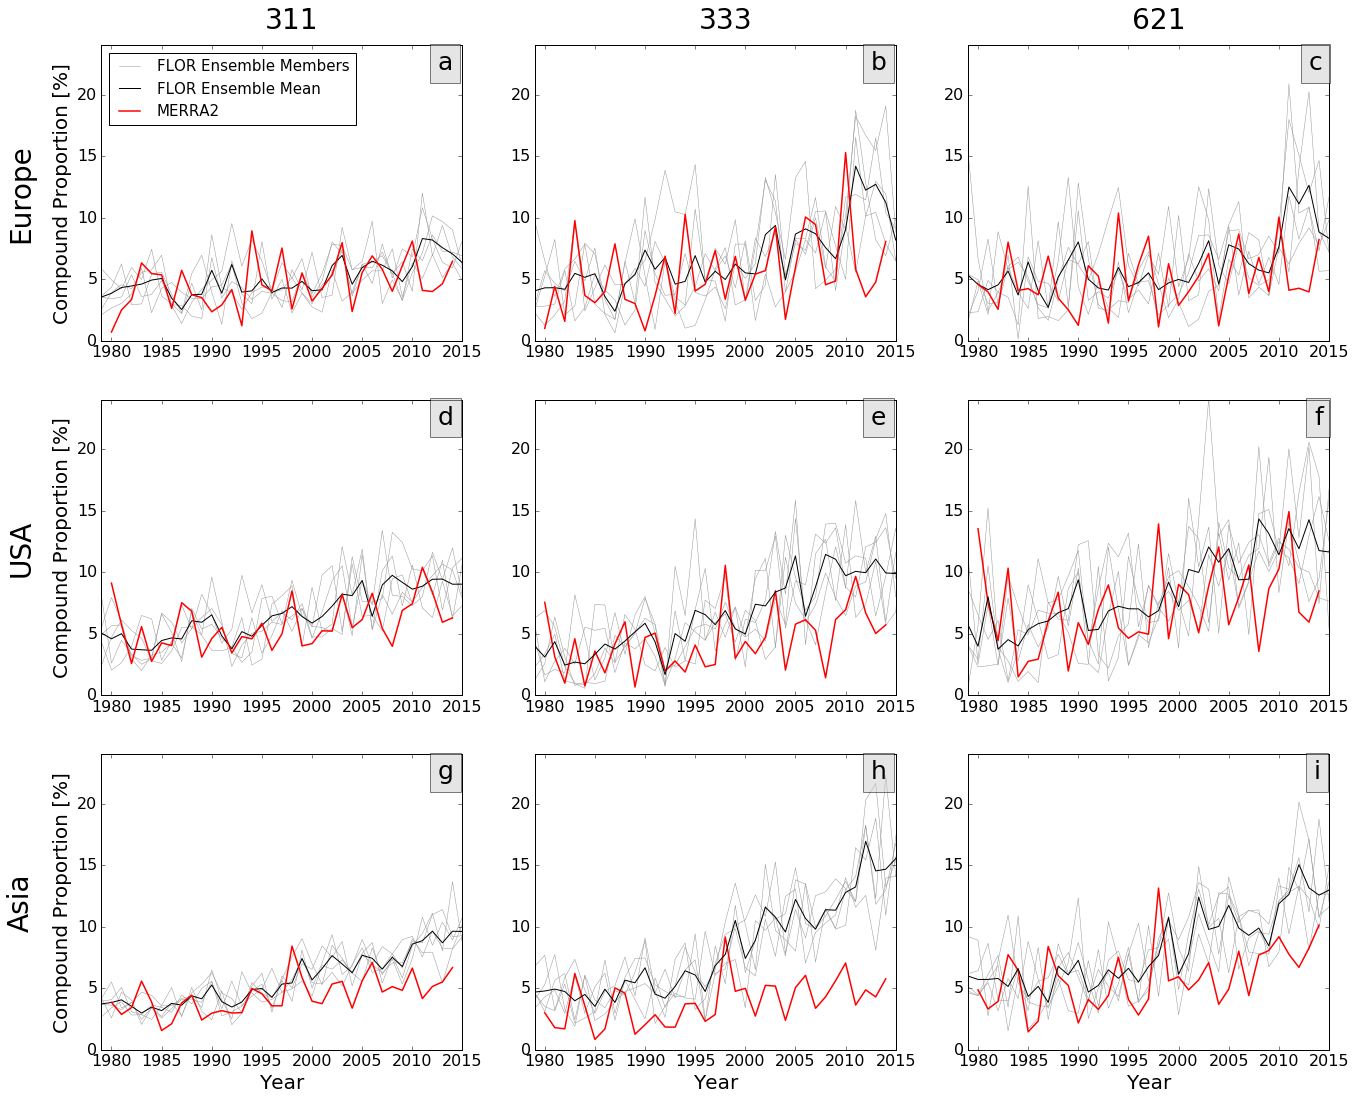

In [58]:
#ENSEMBLE FOR US AND EUROPE AND 3 DEFS FIGURE CP

plt.figure(figsize=(22,18))
plt.rcParams.update({'font.size': 16})
ymax = 24
tmin = 1979
tmax = 2015
lbox = 22
nbox = 26
rbox = 12

plt.subplot(3,3,1)
plt.plot(time,cp_reg['3114']['europe']['1'],color='0.6',linewidth='0.5',label='FLOR Ensemble Members')
for i in np.arange(2,ensmax+1,1):
    plt.plot(time,cp_reg['3114']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,meancp_reg['3114']['europe'],color='k',linewidth='1',label='FLOR Ensemble Mean')
plt.plot(time_m,cp_reg_m['3114']['europe'],color='r',linewidth='1.5',label='MERRA2')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year')
plt.ylabel('Compound Proportion [%]',fontsize='20')
plt.text(1998,nbox, "311", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(1971,rbox, "Europe", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2013-0.5,lbox, "a", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)
plt.legend(loc='upper left',bbox_to_anchor=(0, 1),fontsize=15)

plt.subplot(3,3,3)
for i in num:
    plt.plot(time,cp_reg['6217']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,meancp_reg['6217']['europe'],color='k',linewidth='1')
plt.plot(time_m,cp_reg_m['6217']['europe'],color='r',linewidth='1.5')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year')
#plt.ylabel('Days')
plt.text(1998,nbox, "621", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(2013,lbox, "c", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,2)
for i in num:
    plt.plot(time,cp_reg['3336']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,meancp_reg['3336']['europe'],color='k',linewidth='1')
plt.plot(time_m,cp_reg_m['3336']['europe'],color='r',linewidth='1.5')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year')
#plt.ylabel('Days')
plt.text(1998,nbox, "333", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(2013-0.5,lbox, "b", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,4)
for i in num:
    plt.plot(time,cp_reg['3114']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,meancp_reg['3114']['usa'],color='k',linewidth='1')
plt.plot(time_m,cp_reg_m['3114']['usa'],color='r',linewidth='1.5')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year',fontsize='20')
plt.ylabel('Compound Proportion [%]',fontsize='20')
plt.text(1971,rbox, "USA", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2013-0.5,lbox, "d", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,6)
for i in num:
    plt.plot(time,cp_reg['6217']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,cp_reg_m['6217']['usa'],color='r',linewidth='1.5')
plt.plot(time,meancp_reg['6217']['usa'],color='k',linewidth='1')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2013+0.5,lbox, "f", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,5)
for i in num:
    plt.plot(time,cp_reg['3336']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,cp_reg_m['3336']['usa'],color='r',linewidth='1.5')
plt.plot(time,meancp_reg['3336']['usa'],color='k',linewidth='1')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
#plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2013-0.5,lbox, "e", fontsize=25,bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,7)
for i in num:
    plt.plot(time,cp_reg['3114']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,meancp_reg['3114']['asia'],color='k',linewidth='1')
plt.plot(time_m,cp_reg_m['3114']['asia'],color='r',linewidth='1.5')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
plt.ylabel('Compound Proportion [%]',fontsize='20')
plt.text(1971,rbox, "Asia", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2013-0.5,lbox, "g", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,9)
for i in num:
    plt.plot(time,cp_reg['6217']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,cp_reg_m['6217']['asia'],color='r',linewidth='1.5')
plt.plot(time,meancp_reg['6217']['asia'],color='k',linewidth='1')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2013+0.5,lbox, "i", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,8)
for i in num:
    plt.plot(time,cp_reg['3336']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,cp_reg_m['3336']['asia'],color='r',linewidth='1.5')
plt.plot(time,meancp_reg['3336']['asia'],color='k',linewidth='1')
plt.xlim((tmin,tmax))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2013-0.5,lbox, "h", fontsize=25,bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.savefig('obsvmodel_cp_tmin_2.pdf')

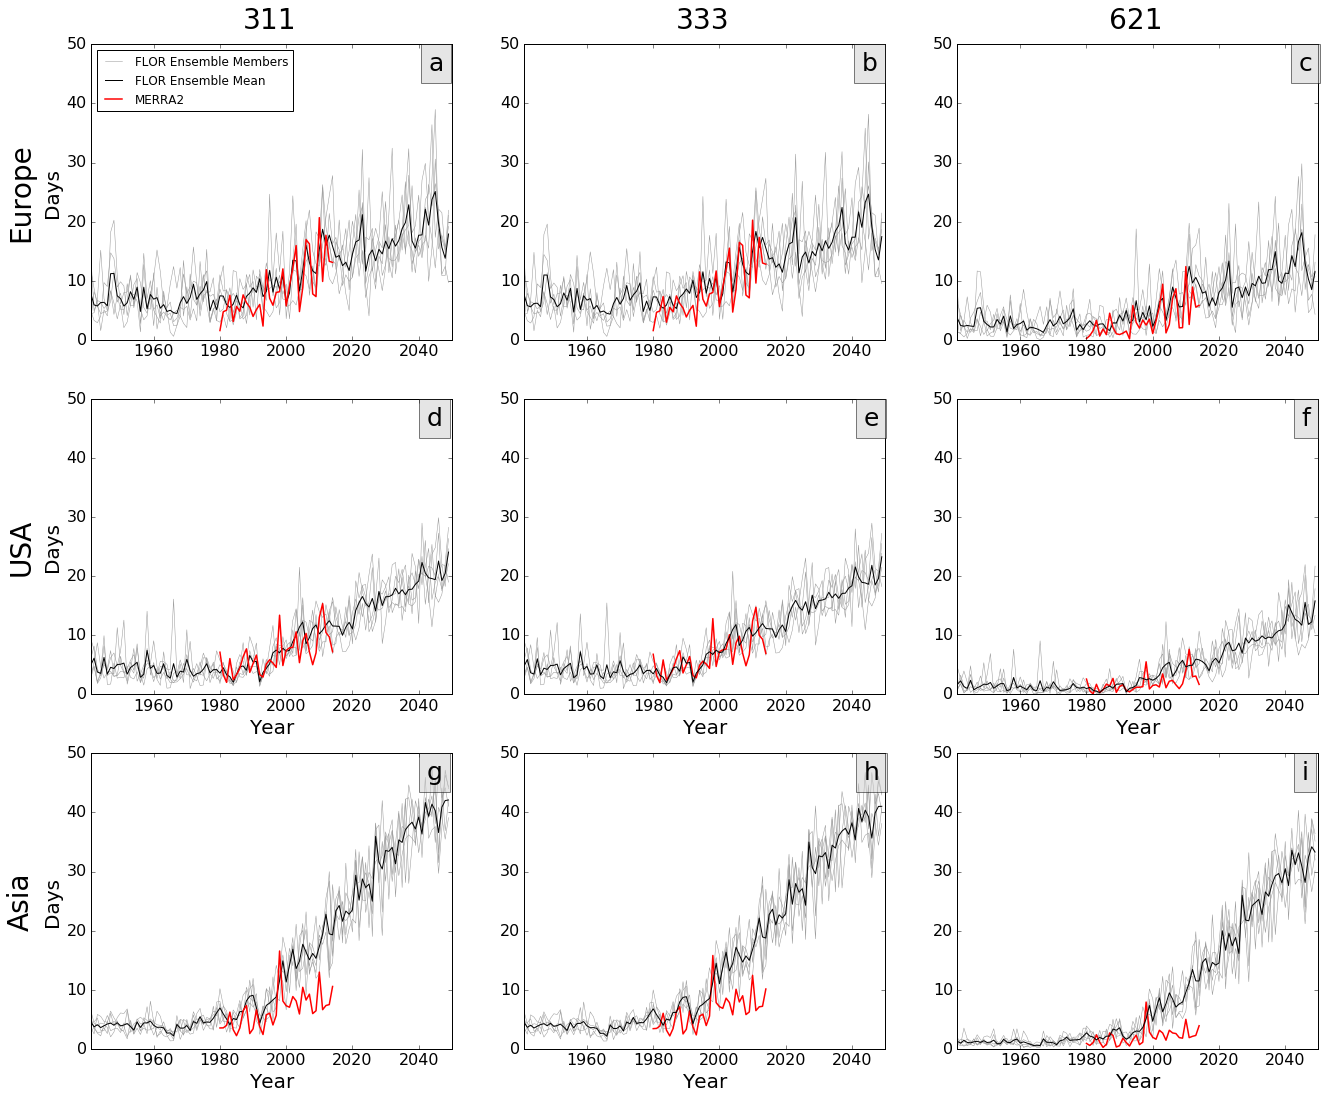

In [81]:
#ENSEMBLE FOR US AND EUROPE AND 3 DEFS FIGURE AHWF

plt.figure(figsize=(22,18))
plt.rcParams.update({'font.size': 16})
ymax = 50
lbox = 45.5
nbox = 54
rbox = 25

plt.subplot(3,3,1)
plt.plot(time,ahwf_reg['3114']['europe']['1'],color='0.6',linewidth='0.5',label='FLOR Ensemble Members')
for i in np.arange(2,ensmax+1,1):
    plt.plot(time,ahwf_reg['3114']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean_reg['3114']['europe'],color='k',linewidth='1',label='FLOR Ensemble Mean')
plt.plot(time_m,ahwf_reg_m['3114']['europe'],color='r',linewidth='1.5',label='MERRA2')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
#plt.xlabel('Year')
plt.ylabel('Days',fontsize='20')
plt.text(1995,nbox, "311", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(1920,rbox, "Europe", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2043,lbox, "a", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)
plt.legend(loc='upper left',bbox_to_anchor=(0, 1),fontsize=12)

plt.subplot(3,3,3)
for i in num:
    plt.plot(time,ahwf_reg['6217']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean_reg['6217']['europe'],color='k',linewidth='1')
plt.plot(time_m,ahwf_reg_m['6217']['europe'],color='r',linewidth='1.5')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
#plt.xlabel('Year')
#plt.ylabel('Days')
plt.text(1995,nbox, "621", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(2044,lbox, "c", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,2)
for i in num:
    plt.plot(time,ahwf_reg['3336']['europe'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean_reg['3336']['europe'],color='k',linewidth='1')
plt.plot(time_m,ahwf_reg_m['3336']['europe'],color='r',linewidth='1.5')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
#plt.xlabel('Year')
#plt.ylabel('Days')
plt.text(1995,nbox, "333", fontsize=28, rotation='horizontal',ha='center',va='center')
plt.text(2043,lbox, "b", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,4)
for i in num:
    plt.plot(time,ahwf_reg['3114']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean_reg['3114']['usa'],color='k',linewidth='1')
plt.plot(time_m,ahwf_reg_m['3114']['usa'],color='r',linewidth='1.5')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
plt.ylabel('Days',fontsize='20')
plt.text(1920,rbox, "USA", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2042.5,lbox, "d", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,6)
for i in num:
    plt.plot(time,ahwf_reg['6217']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,ahwf_reg_m['6217']['usa'],color='r',linewidth='1.5')
plt.plot(time,mean_reg['6217']['usa'],color='k',linewidth='1')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2045,lbox, "f", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,5)
for i in num:
    plt.plot(time,ahwf_reg['3336']['usa'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,ahwf_reg_m['3336']['usa'],color='r',linewidth='1.5')
plt.plot(time,mean_reg['3336']['usa'],color='k',linewidth='1')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2043.5,lbox, "e", fontsize=25,bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,7)
for i in num:
    plt.plot(time,ahwf_reg['3114']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time,mean_reg['3114']['asia'],color='k',linewidth='1')
plt.plot(time_m,ahwf_reg_m['3114']['asia'],color='r',linewidth='1.5')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
plt.ylabel('Days',fontsize='20')
plt.text(1920,rbox, "Asia", fontsize=28, rotation='vertical',ha='center',va='center')
plt.text(2042.5,lbox, "g", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,9)
for i in num:
    plt.plot(time,ahwf_reg['6217']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,ahwf_reg_m['6217']['asia'],color='r',linewidth='1.5')
plt.plot(time,mean_reg['6217']['asia'],color='k',linewidth='1')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2045,lbox, "i", fontsize=25, bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)

plt.subplot(3,3,8)
for i in num:
    plt.plot(time,ahwf_reg['3336']['asia'][str(i)],color='0.6',linewidth='0.5')
plt.plot(time_m,ahwf_reg_m['3336']['asia'],color='r',linewidth='1.5')
plt.plot(time,mean_reg['3336']['asia'],color='k',linewidth='1')
plt.xlim((1941,2050))
plt.ylim((0,ymax))
plt.xlabel('Year',fontsize='20')
#plt.ylabel('Days')
plt.text(2043.5,lbox, "h", fontsize=25,bbox=dict(boxstyle='square',
            fc='0.8', alpha=0.5), zorder=100)


plt.savefig('obsvmodel_ahwf_tmin.pdf')